In [181]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

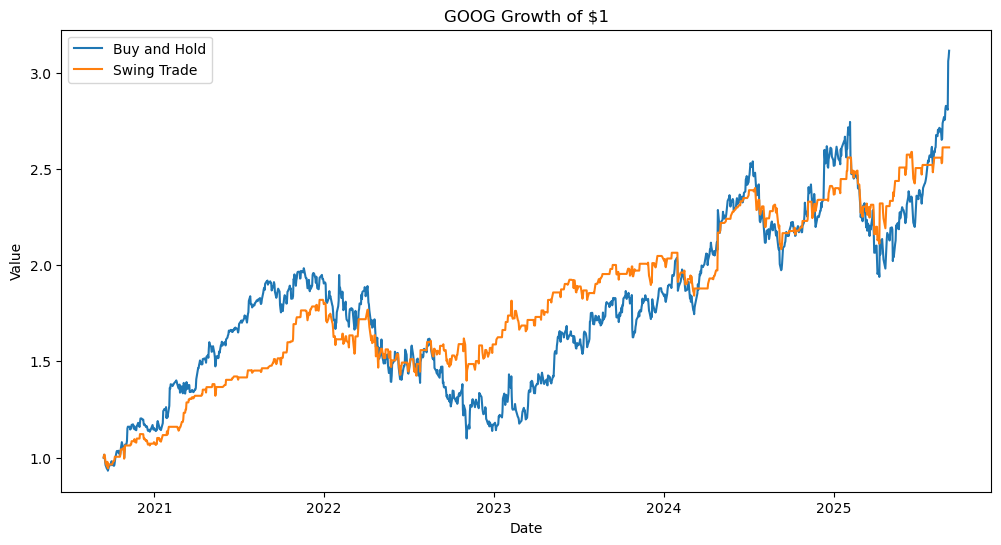

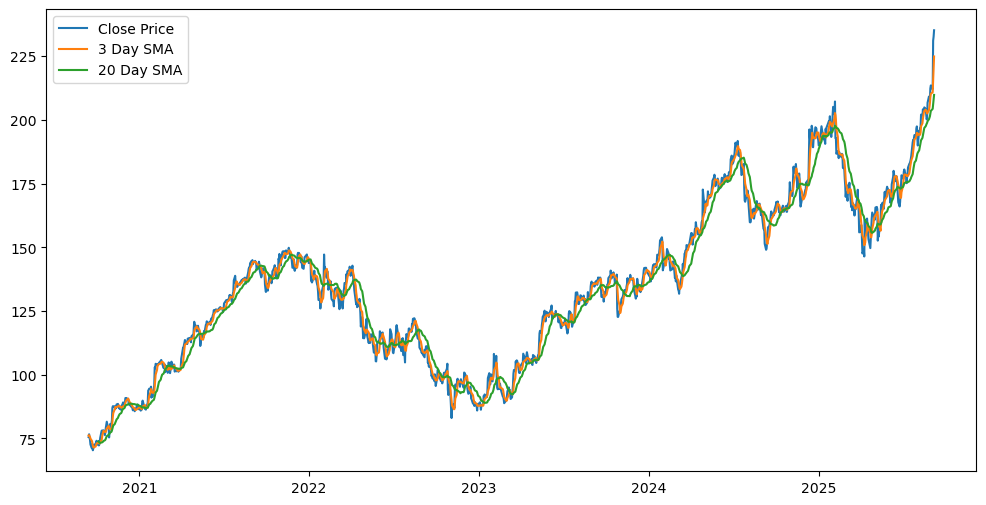

Date
2025-08-22 00:00:00-04:00    2.611793
2025-08-25 00:00:00-04:00    2.611793
2025-08-26 00:00:00-04:00    2.611793
2025-08-27 00:00:00-04:00    2.611793
2025-08-28 00:00:00-04:00    2.611793
2025-08-29 00:00:00-04:00    2.611793
2025-09-02 00:00:00-04:00    2.611793
2025-09-03 00:00:00-04:00    2.611793
2025-09-04 00:00:00-04:00    2.611793
2025-09-05 00:00:00-04:00    2.611793
Name: Strat_Cum, dtype: float64

In [182]:
TICKER = "GOOG"
PERIOD = "5y"
INTERVAL = "1d"
GOOG = yf.Ticker(TICKER)
GOOG_PRICES = GOOG.history(period="5y", interval="1d")
GOOG_PRICES["3ma"] = GOOG_PRICES["Close"].rolling(5).mean()
GOOG_PRICES["20ma"] = GOOG_PRICES["Close"].rolling(20).mean()
GOOG_PRICES = GOOG_PRICES.dropna(subset=["3ma"]).copy()
signal_today = (GOOG_PRICES["Close"] < GOOG_PRICES["3ma"]).astype(int)
GOOG_PRICES["Position"] = signal_today.shift(1).fillna(0)
GOOG_PRICES["Return"] = GOOG_PRICES["Close"].pct_change().fillna(0)
GOOG_PRICES["Strat_Ret"] = GOOG_PRICES["Return"] * GOOG_PRICES["Position"]
GOOG_PRICES["Market_Cum"] = (1 + GOOG_PRICES["Return"]).cumprod()
GOOG_PRICES["Strat_Cum"] = (1 + GOOG_PRICES["Strat_Ret"]).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Market_Cum"], label="Buy and Hold")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Strat_Cum"], label="Swing Trade")
plt.title("GOOG Growth of $1")
plt.xlabel("Date"), plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Close"], label="Close Price")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["3ma"], label="3 Day SMA")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["20ma"], label="20 Day SMA")
plt.legend()
plt.show()
GOOG_PRICES["Strat_Cum"].tail(10)

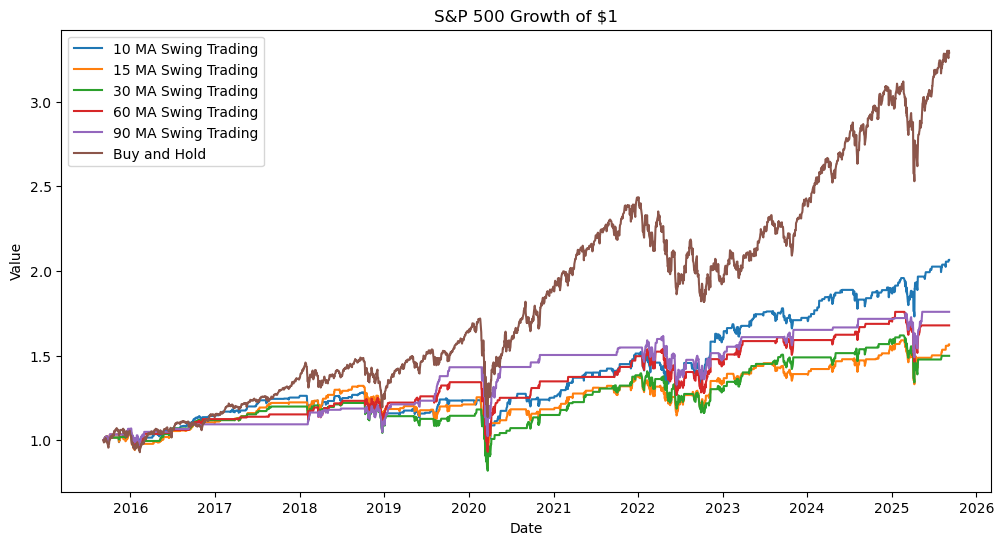

In [183]:
SP500 = yf.Ticker("^GSPC")
sp_prices = pd.DataFrame(SP500.history(period="10y", interval="1d"))
plt.figure(figsize=(12, 6))
sp_prices["5ma"] = sp_prices["Close"].ewm(span=5, adjust=False).mean()

for i in (10, 15, 30, 60, 90):
    sp_prices_iteration = sp_prices.copy()
    sp_prices_iteration["long_ma"] = sp_prices_iteration["Close"].ewm(
        span=i, adjust=False).mean()
    sp_prices_iteration = sp_prices_iteration.dropna(subset=["5ma", "long_ma"])
    signal_buy = (sp_prices_iteration["Close"] <
                  sp_prices_iteration["long_ma"]).astype(int)
    sp_prices_iteration["strat_ret"] = (
        1 + sp_prices_iteration["Close"].pct_change().fillna(0) * signal_buy.shift(1).fillna(0)).cumprod()
    plt.plot(sp_prices_iteration.index,
             sp_prices_iteration["strat_ret"], label=f"{i} MA Swing Trading")
sp_prices["mkt_ret"] = (1+sp_prices["Close"].pct_change().fillna(0)).cumprod()

plt.title("S&P 500 Growth of $1")
plt.xlabel("Date"), plt.ylabel("Value")
plt.plot(sp_prices.index, sp_prices["mkt_ret"], label="Buy and Hold")
plt.legend()
plt.show()

In [184]:
df = yf.download(tickers="TSLA, AAPL", period="5y", interval="1d")
df["7ema", "TSLA"], df["7ema", "AAPL"] = df["Close", "TSLA"].ewm(
    span=7, adjust=False).mean(), df["Close", "AAPL"].ewm(span=7, adjust=False).mean()
df["21ema", "TSLA"], df["21ema", "AAPL"] = df["Close", "TSLA"].ewm(
    span=21, adjust=False).mean(), df["Close", "AAPL"].ewm(span=21, adjust=False).mean()
df = df.dropna(subset=[("7ema", "TSLA"), ("21ema", "TSLA")])
signal_buy_tsla = ((df["7ema", "TSLA"] > df["21ema", "TSLA"]) & (
    df["Close", "TSLA"] > df["7ema", "TSLA"])).astype(int)
df["eq_value", "TSLA"] = (
    1+df["Close", "TSLA"].pct_change() * signal_buy_tsla.shift(1)).cumprod()
df["mkt_value", "TSLA"] = (1+df["Close", "TSLA"].pct_change()).cumprod()
df

/var/folders/qy/v8xq2pb11n5c02fypwnbyv_80000gn/T/ipykernel_27791/1425090298.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers="TSLA, AAPL", period="5y", interval="1d")
[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2020-09-08  109.742027  110.070000  115.743695  122.913330  109.605847   
2020-09-09  114.119247  122.093330  115.889593  123.000000  112.115451   
2020-09-10  110.393730  123.779999  117.212483  132.996674  109.430742   
2020-09-11  108.944405  124.239998  112.086287  127.500000  106.998969   
2020-09-14  112.212723  139.873337  112.767172  140.000000  109.722568   
...                ...         ...         ...         ...         ...   
2025-08-29  232.139999  333.869995  233.380005  348.750000  231.369995   
2025-09-02  229.720001  329.359985  230.850006  333.329987  226.970001   
2025-09-03  238.470001  334.089996  238.850006  343.329987  234.360001   
2025-09-04  239.779999  338.529999  239.899994  338.890015  236.740005   
2025-09-05  239.690002  350.839996  241.320007  355.869995  238.490005   

Price                         Open                 Volume             \
Ticker            TSLA        AAPL        TSLA       AAPL       TSLA   
Date                                                                   
2020-09-08  109.959999  110.841196  118.666664  231366600  346397100   
2020-09-09  113.836670  114.060887  118.866669  176940500  238397400   
2020-09-10  120.186668  117.076303  128.736664  182274400  254791800   
2020-09-11  120.166664  111.444289  127.313332  180860300  182152500   
2020-09-14  124.433334  111.590184  126.983330  140150100  249061800   
...                ...         ...         ...        ...        ...   
2025-08-29  331.700012  232.509995  347.230011   39418400   81145700   
2025-09-02  325.600006  229.250000  328.230011   44075600   58392000   
2025-09-03  328.510010  237.210007  335.200012   66427800   88733300   
2025-09-04  331.480011  238.449997  336.149994   47549400   60711000   
2025-09-05  344.679993  240.000000  348.000000   54837300  108771700   

Price             7ema                   21ema              eq_value mkt_value  
Ticker            TSLA        AAPL        TSLA        AAPL      TSLA      TSLA  
Date                                                                            
2020-09-08  110.070000  109.742027  110.070000  109.742027       NaN       NaN  
2020-09-09  113.075832  110.836332  111.163030  110.139956  1.000000  1.109233  
2020-09-10  115.751874  110.725682  112.310027  110.163027  1.013815  1.124557  
2020-09-11  117.873905  110.280362  113.394570  110.052243  1.017582  1.128736  
2020-09-14  123.373763  110.763453  115.801730  110.248650  1.145626  1.270767  
...                ...         ...         ...         ...       ...       ...  
2025-08-29  340.451330  230.191814  333.646268  225.397462  5.101654  3.033252  
2025-09-02  337.678494  230.073861  333.256606  225.790420  5.101654  2.992278  
2025-09-03  336.781369  232.172896  333.332369  226.943109  5.101654  3.035250  
2025-09-04  337.218527  234.074672  333.804881  228.110099  5.101654  3.075588  
2025-09-05  340.623894  235.478504  335.353527  229.162817  5.287166  3.187426  

[1255 rows x 16 columns]

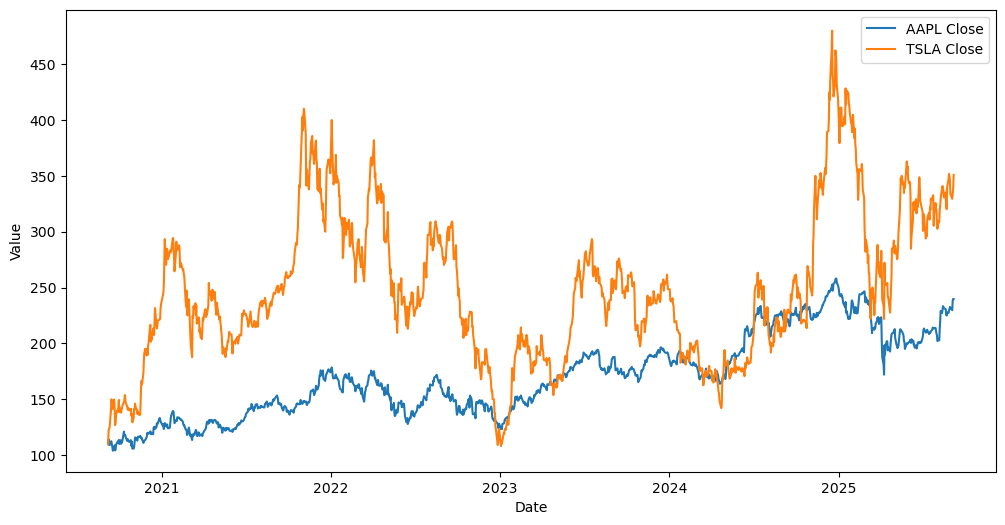

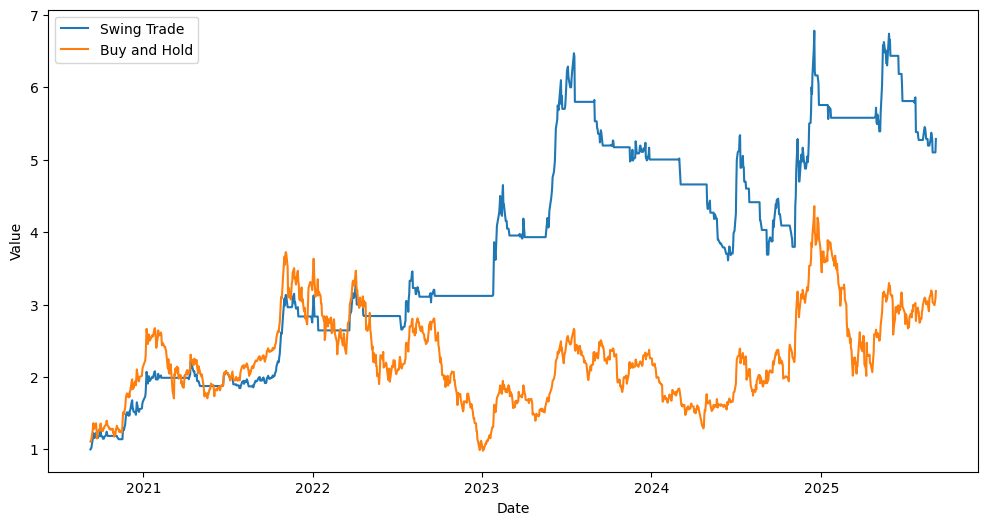

In [185]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close", "AAPL"], label="AAPL Close")
plt.plot(df.index, df["Close", "TSLA"], label="TSLA Close")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["eq_value", "TSLA"], label="Swing Trade")
plt.plot(df.index, df["mkt_value", "TSLA"], label="Buy and Hold")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()